In [2]:
# NIKKEI 225 analysis

In [3]:
!pip install yfinance
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install statsmodels
!pip install sklearn

In [4]:
import yfinance as yf
import seaborn as sn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk

In [5]:
df= yf.download("^N225", start="2020-01-10", end= "2021-03-09", interval="1d")
df= df.to_csv('C:\\Users\\Admin\\Documents\\PYTHON\\California birth rate stock\\NIKKEI225.csv')
f_birth = pd.read_csv('NIKKEI225.csv', parse_dates= [0], index_col=[0])

#f_birth = pd.read_df('df', parse_dates= [0], index_col=[0])

[*********************100%***********************]  1 of 1 completed


In [6]:
f_birth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-10,23813.279297,23903.289062,23761.080078,23850.570312,23850.570312,55900000
2020-01-14,23969.039062,24059.859375,23951.660156,24025.169922,24025.169922,64200000
2020-01-15,23923.480469,23997.390625,23875.820312,23916.580078,23916.580078,57200000
2020-01-16,23960.199219,23975.380859,23905.380859,23933.130859,23933.130859,55400000
2020-01-17,24103.449219,24115.949219,24013.750000,24041.259766,24041.259766,59400000


In [7]:
f_birth.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-02,29939.750000,29996.390625,29314.820312,29408.169922,29408.169922,70100000
2021-03-03,29482.119141,29604.369141,29336.599609,29559.099609,29559.099609,68800000
2021-03-04,29198.419922,29277.189453,28711.039062,28930.109375,28930.109375,75200000
2021-03-05,28725.480469,28867.830078,28308.570312,28864.320312,28864.320312,85800000
2021-03-08,29208.189453,29255.900391,28644.259766,28743.250000,28743.250000,92400000


In [8]:
f_birth = f_birth.drop(["Open","High","Low","Adj Close", "Volume"], axis=1)

In [9]:
f_birth

,Close
Date,
2020-01-10,23850.570312
2020-01-14,24025.169922
2020-01-15,23916.580078
2020-01-16,23933.130859
2020-01-17,24041.259766
...,...
2021-03-02,29408.169922
2021-03-03,29559.099609
2021-03-04,28930.109375


In [10]:
f_birth.tail(12)

,Close
Date,
2021-02-18,30236.089844
2021-02-19,30017.919922
2021-02-22,30156.029297
2021-02-24,29671.699219
2021-02-25,30168.269531
2021-02-26,28966.009766
2021-03-01,29663.500000
2021-03-02,29408.169922
2021-03-03,29559.099609


In [11]:
f_birth.Close

Date
2020-01-10    23850.570312
2020-01-14    24025.169922
2020-01-15    23916.580078
2020-01-16    23933.130859
2020-01-17    24041.259766
                  ...     
2021-03-02    29408.169922
2021-03-03    29559.099609
2021-03-04    28930.109375
2021-03-05    28864.320312
2021-03-08    28743.250000
Name: Close, Length: 281, dtype: float64

In [12]:
f_birth.count()

Close    281
dtype: int64

In [13]:
f_birth.describe()


,Close
count,281.000000
mean,23634.973859
std,3104.483294
min,16552.830078
25%,22288.140625
50%,23249.609375
75%,26014.619141
max,30467.750000


In [14]:
f_birth.mode()

,Close
0,16552.830078
1,16726.550781
2,16887.779297
3,17002.039062
4,17011.529297
...,...
276,30156.029297
277,30168.269531
278,30236.089844
279,30292.189453


In [15]:
type(f_birth.Close)  # pandas.core.series.Series

pandas.core.series.Series

In [16]:
#Convret dataframe into series which is needed by models.

In [17]:
f_birth_series = f_birth.values
# f_birth_series

In [18]:
# Visualise the trend

C:\Users\Admin\anaconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

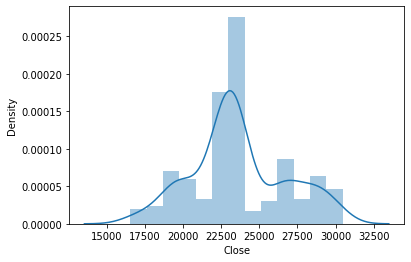

In [19]:
import seaborn as sb
sb.distplot(f_birth['Close'], kde= True)

<AxesSubplot:>

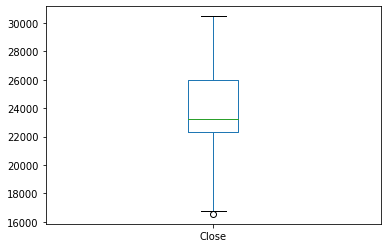

In [20]:
f_birth.plot(kind="box")

<AxesSubplot:xlabel='Date'>

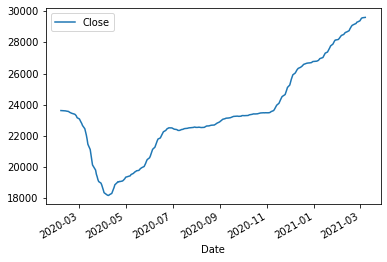

In [21]:
f_birth_mean = f_birth.rolling(window = 20).mean() # easier to observe the trend
f_birth_mean.plot()

# Decompose time series into its components

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [23]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(f_birth['Close'], model='multiplicative', extrapolate_trend='freq', period=int(len(f_birth)/2))

In [24]:
# Additive Decomposition
result_add = seasonal_decompose(f_birth['Close'], model='additive', extrapolate_trend='freq', period=int(len(f_birth)/2))

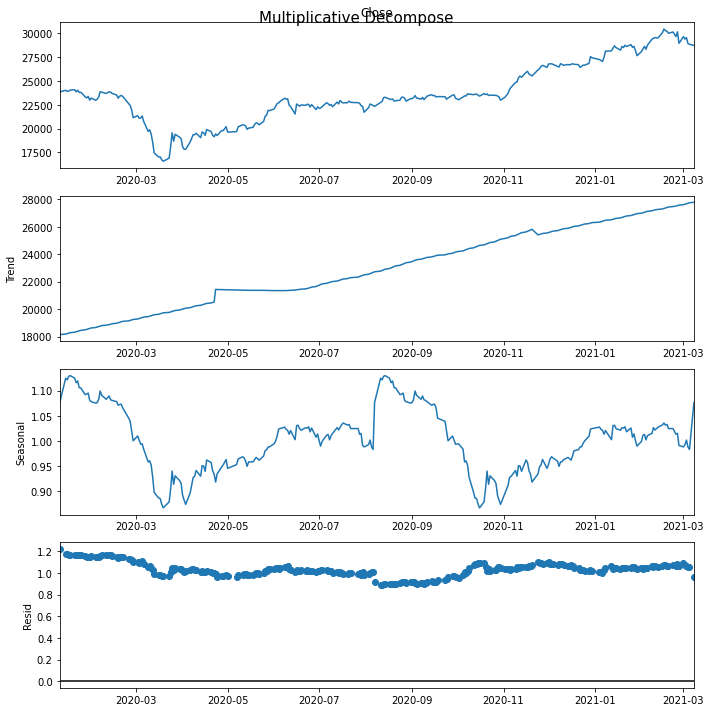

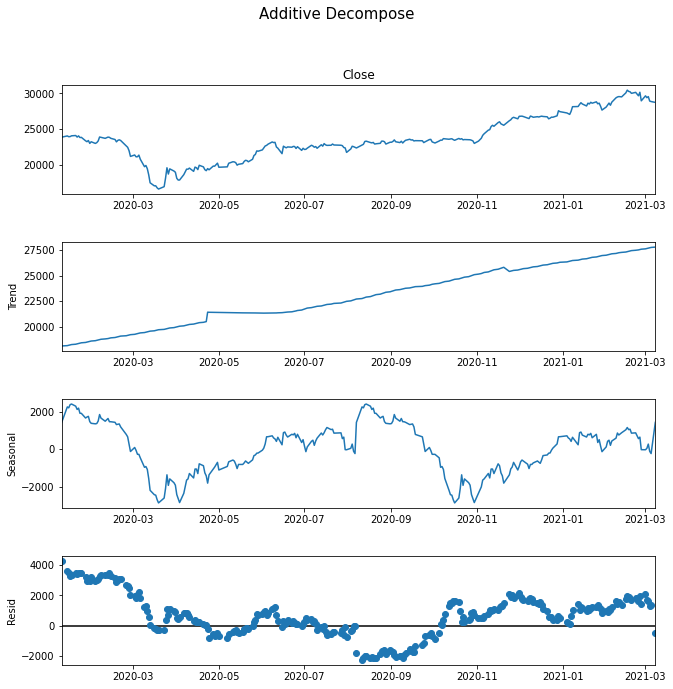

In [25]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=15)
result_add.plot().suptitle('Additive Decompose', fontsize=15)
plt.tight_layout(pad=3.08)
plt.show()


Residuals of the additive decomposition has some pattern left over.
The multiplicative decomposition, however, looks quite random which is good.
So ideally, multiplicative decomposition should be preferred for this particular series'


# Simple prediction uing shift function. Baseline model

In [26]:
f_birth_baseline = f_birth.copy()

In [27]:
f_birth_baseline['Close_forecast'] = f_birth_baseline['Close'].shift(1)

In [28]:
f_birth_baseline.head()

,Close,Close_forecast
Date,,
2020-01-10,23850.570312,NaN
2020-01-14,24025.169922,23850.570312
2020-01-15,23916.580078,24025.169922
2020-01-16,23933.130859,23916.580078
2020-01-17,24041.259766,23933.130859


In [29]:
# Calculate mean squared error of this simple baseline model

In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [31]:
f_birth_baseline.dropna(inplace=True) # drop nan value

In [32]:
f_birth_baseline_error = np.sqrt(mean_squared_error(f_birth_baseline['Close'], f_birth_baseline['Close_forecast'])) # take square root of mse
f_birth_baseline_error

343.06875916282655

In [33]:
!pip install statsmodels

# ARIMA Autoregressive(p) Integrated(d) Moving average(q)

#### Finding p,d,q values for a simple model

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import root_mean_square_error
#from statsmodels.tsa.stattools import r_square_error
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import adfuller

In [35]:
f_birth.head()

,Close
Date,
2020-01-10,23850.570312
2020-01-14,24025.169922
2020-01-15,23916.580078
2020-01-16,23933.130859
2020-01-17,24041.259766


In [36]:
result = adfuller(f_birth_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.452662
p-value: 0.900928


In [37]:
# as p value is less than 0.05 we can say the data is stationary

#### plot_acf to calculate thevalue of p

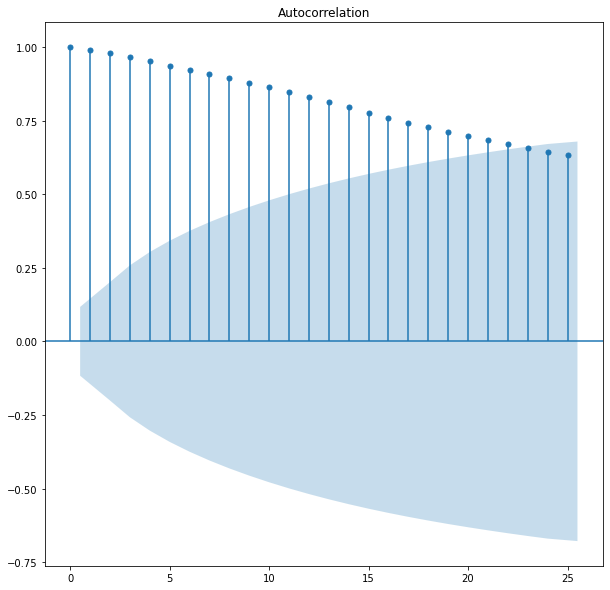

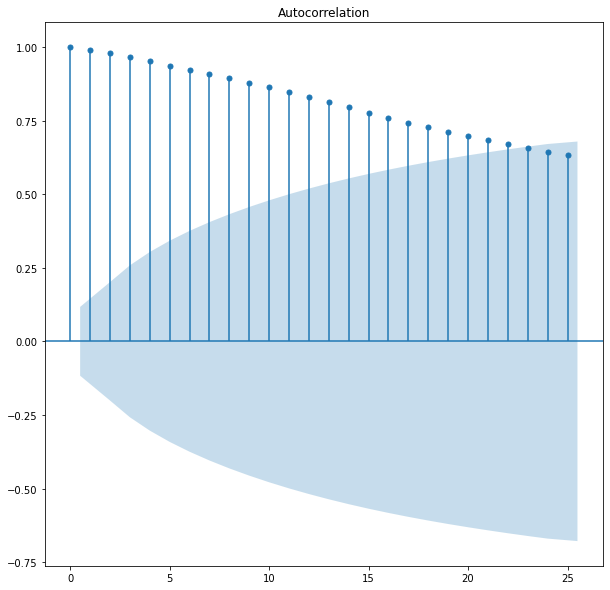

In [38]:
plot_acf(f_birth_series)

In [39]:
# p value could be 2,3

#### plot_pacf is to calculate value of q

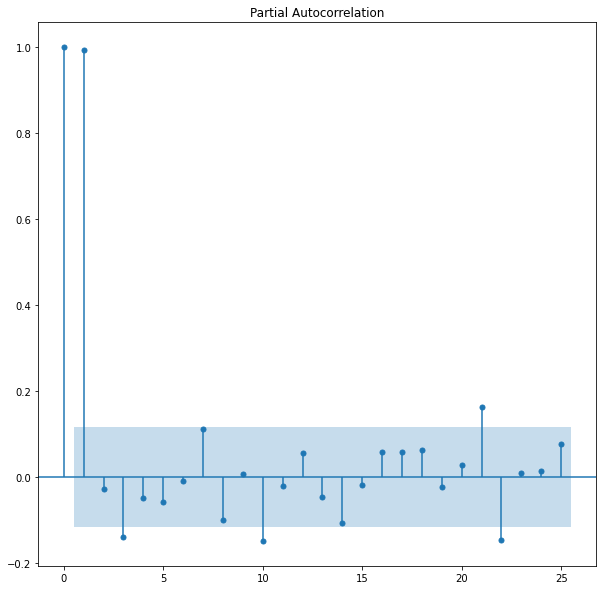

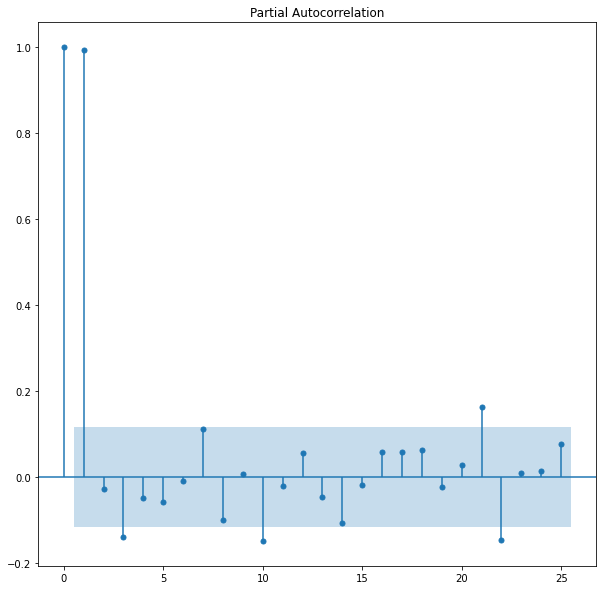

In [40]:
plot_pacf(f_birth_series)

In [41]:
# q  value could be 2,3

# Simple Modelling

In [42]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels as sm
import warnings

In [43]:
# Split the dataset
split = int(len(f_birth_series) * 0.9)
f_birth_series_train = f_birth_series[:split]
f_birth_series_test = f_birth_series[split:]

In [52]:
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r_squared_error
from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import hqic_sigma
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [54]:
model = ARIMA(f_birth_series_train, order=(1,0,0))
model_fit = model.fit()
print('AIC Score', model_fit.aic)
print('BIC Score', model_fit.bic)

model_forecast = model_fit.forecast(steps=5)[0]
# model_forecast 
print('RMSE -', np.sqrt(mean_squared_error(f_birth_series_test, model_forecast)))
#print('R2ERROR -', np(r_squared_error(f_birth_series_test, model_forecast)))
print('MAPE -', np.sqrt(mean_absolute_percentage_error(f_birth_series_test, model_forecast)))
print('MAE -', np.sqrt(mean_absolute_error(f_birth_series_test, model_forecast)))
#print('MAE -', np.sqrt(mean_absolute_error(f_birth_series_test, model_forecast)))
#print('hqic_sigma', model_fit.hqic_sigma)
#print('interquartile range of error', model_fit.iqr)

AIC Score 3652.2982030553762
BIC Score 3662.8864903179106


ValueError: Found input variables with inconsistent numbers of samples: [29, 5]

In [55]:
model_forecast

array([28608.0398819 , 28584.77357078, 28561.64941153, 28538.66653564,
       28515.8240799 ])

# Modelling using a function to hyper tune the ARIMA parameters, split data

In [48]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = np.sqrt(mean_squared_error(test, predictions))
    return error
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [53]:
p_values = [1]
d_values = [0] # range(0, 2)
q_values = [0] # range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(f_birth_series, p_values, d_values, q_values)

ARIMA(1, 0, 0) RMSE=318.843
Best ARIMA(1, 0, 0) RMSE=318.843


In [47]:
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r_squared_error
from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import hqic_sigma
from sklearn.metrics import mean_absolute_error
print('R2ERROR -', np(r_squared_error(f_birth_series_test, model_forecast)))
print('MAPE -', np.sqrt(mean_absolute_percentage_error(f_birth_series_test, model_forecast)))
print('MAE -', np.sqrt(mean_absolute_error(f_birth_series_test, model_forecast)))

#print('hqic_sigma', model_fit.hqic_sigma)
#print('interquartile range of error', model_fit.iqr)

NameError: name 'r_squared_error' is not defined

In [ ]:
import sklearn 
print(sklearn.__version__)